In [1]:
import pandas as pd
import numpy as np

In [2]:
class KMeans:
    def __init__(self, k, iter_num=1000):
        self.k = k
        self.iter_num = iter_num
        
    def _get_euc_dist(self, X, centroids):
        euc_dist = np.array([]).reshape(X.shape[0], 0)
        for i in range(self.k):
            distance = np.sum((X - centroids[:, i]) ** 2, axis=1)
            euc_dist = np.c_[euc_dist, distance]
        return euc_dist
        
    def fit(self, X):
        m = X.shape[0]
        n = X.shape[1]
        self.centroids = np.array([]).reshape(n, 0)
        
        idx = np.random.choice(m-1, self.k)
        for i in idx:
            self.centroids = np.c_[self.centroids, X[i]]
        
        for num in range(self.iter_num):
            euc_dist = self._get_euc_dist(X, self.centroids)

            C = np.argmin(euc_dist, axis=1)

            Y = {}
            for k in range(self.k):
                Y[k] = []
            for i in range(m):
                group = C[i]
                Y[group].append(X[i].tolist())
            for i in range(self.k):
                Y[i] = np.array(Y[i])
            for k in range(self.k):
                self.centroids[:,k]=np.mean(Y[k],axis=0)
            self.temp_centroids = self.centroids

            self.output = Y
            
    def predict(self):
        return self.output

In [3]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=500, centers=3)

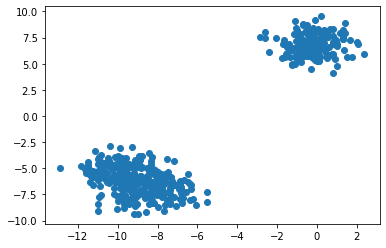

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1])

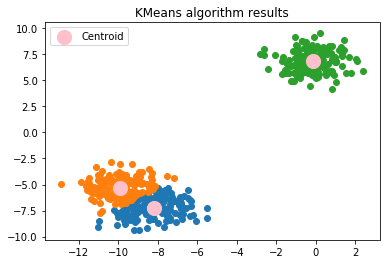

In [5]:
model = KMeans(3)
model.fit(X)
output = model.predict()
centroids = model.centroids.T

for i in range(3):
    plt.scatter(output[i][:,0], output[i][:,1])
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, label='Centroid', c='pink')
plt.title('KMeans algorithm results')
plt.legend()